# Assessing the volatility risk of some financial assets (Bitcoin, Ethereum, and a stablecoin (USDT) using VaR and cVaR

In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import requests

## 1st Illustration: Collateral Downside Risk Analysis 

### **1. Historical Method VaR**  
This is probably the simplest and most intuitive method of calculating Value at Risk.

In [2]:
def getHistoricalVar(returns, confidenceLevel):
    var = 100 * np.percentile(returns, 100 - confidenceLevel)
    print(
        "With %.2f%% percent confidence, we can say the most our portfolio will lose in a day is %.3f%% using historical VaR"
        % (confidenceLevel, var)
    )

#### Bitcoin

In [3]:
#!pip install yfinance

start = datetime.date(2022, 7, 10)-datetime.timedelta(365*5)
end = datetime.date(2022, 7, 10)

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

prices = pdr.get_data_yahoo("BTC-USD", start, end)["Adj Close"]
btc_returns = prices.pct_change()
btc_returns = btc_returns.dropna()

[*********************100%***********************]  1 of 1 completed


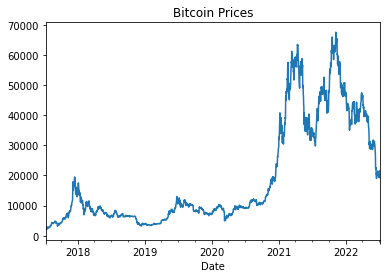

In [4]:
ax = prices.plot()
ax.set_title('Bitcoin Prices')
plt.savefig("Bitcoin Prices.jpg")

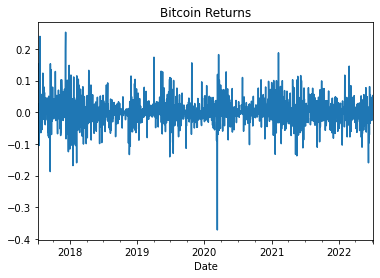

In [5]:
ax = btc_returns.plot()
ax.set_title('Bitcoin Returns')
plt.savefig("Bitcoin Returns.jpg")

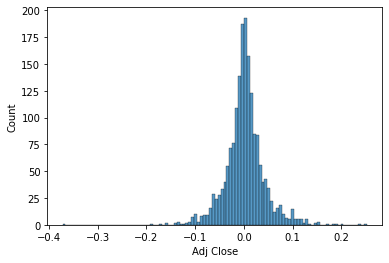

In [6]:
sns.histplot(data=btc_returns)

In [7]:
getHistoricalVar(btc_returns, 95)
getHistoricalVar(btc_returns, 99)

With 95.00% percent confidence, we can say the most our portfolio will lose in a day is -6.267% using historical VaR
With 99.00% percent confidence, we can say the most our portfolio will lose in a day is -10.527% using historical VaR


#### Ethereum

In [8]:

prices = pdr.get_data_yahoo("ETH-USD", start, end)["Adj Close"]

eth_returns = prices.pct_change()
eth_returns = eth_returns.dropna()


[*********************100%***********************]  1 of 1 completed


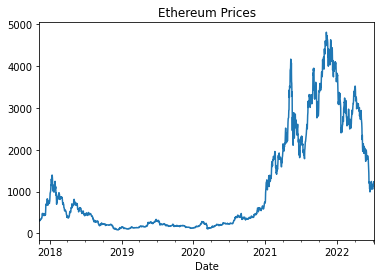

In [9]:
ax = prices.plot()
ax.set_title('Ethereum Prices')
plt.savefig("Ethereum Prices.jpg")

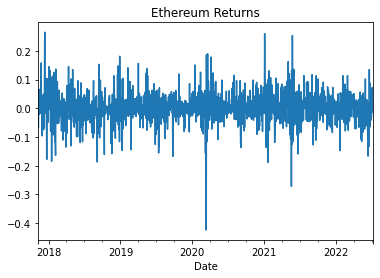

In [10]:
ax = eth_returns.plot()
ax.set_title('Ethereum Returns')
plt.savefig("Ethereum Returns.jpg")

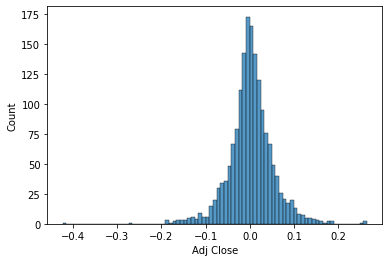

In [11]:
sns.histplot(data=eth_returns)

In [12]:
getHistoricalVar(eth_returns, 95)
getHistoricalVar(eth_returns, 99)

With 95.00% percent confidence, we can say the most our portfolio will lose in a day is -7.668% using historical VaR
With 99.00% percent confidence, we can say the most our portfolio will lose in a day is -13.646% using historical VaR


#### USDT

In [13]:
prices = pdr.get_data_yahoo("USDT-USD", start, end)["Adj Close"]

usdt_returns = prices.pct_change()
usdt_returns = usdt_returns.dropna()

[*********************100%***********************]  1 of 1 completed


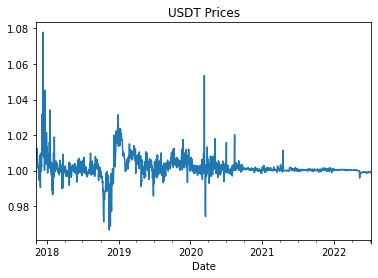

In [14]:
ax = prices.plot()
ax.set_title('USDT Prices')
plt.savefig("USDT Prices.jpg")

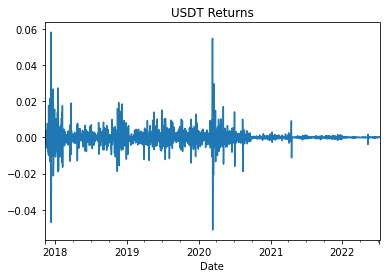

In [15]:
ax = usdt_returns.plot()
ax.set_title('USDT Returns')
plt.savefig("USDT Returns.jpg")

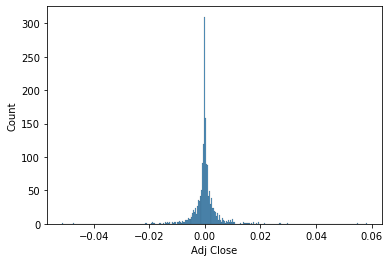

In [16]:
sns.histplot(data=usdt_returns)

In [17]:
getHistoricalVar(usdt_returns, 95)
getHistoricalVar(usdt_returns, 99)

With 95.00% percent confidence, we can say the most our portfolio will lose in a day is -0.560% using historical VaR
With 99.00% percent confidence, we can say the most our portfolio will lose in a day is -1.343% using historical VaR


### **2. Conditional Value at Risk (CVaR)**  
CVaR is also commonly known as expected shortfall. To calculate this, we look at all of the daily returns that are lower than our Value at Risk and take the average of those values. It's as simple as that.

In [18]:
def getHistoricalCVar(returns, confidenceLevel):
    var = np.percentile(returns, 100 - confidenceLevel)
    cvar = returns[returns <= var].mean()
    print(
        "With %.2f%% percent confidence VaR, our Expected Shortfall is %.2f%% using historical VaR"
        % (confidenceLevel, 100 * cvar)
    )

#### Bitcoin

In [19]:
getHistoricalCVar(btc_returns, 95)

With 95.00% percent confidence VaR, our Expected Shortfall is -9.29% using historical VaR


#### Ethereum

In [20]:
getHistoricalCVar(eth_returns, 95)

With 95.00% percent confidence VaR, our Expected Shortfall is -11.73% using historical VaR


#### USDT 

In [21]:
getHistoricalCVar(usdt_returns, 95)

With 95.00% percent confidence VaR, our Expected Shortfall is -1.08% using historical VaR


### **3. Implementing VaR - Parametric Method with Normal Distribution**  

#### Bitcoin 

In [22]:
mean = btc_returns.mean()
std = btc_returns.std()
(100 * stats.norm.ppf(0.05, mean, std)).round(3)

-6.666

This method gives us a 95% confidence VaR of -6.667%. We can compare it to the historical method using our previous function.

#### Ethereum 

In [23]:
mean = eth_returns.mean()
std = eth_returns.std()
(100 * stats.norm.ppf(0.05, mean, std)).round(3)

-8.203

This method gives us a 95% confidence VaR of -8.203%. We can compare it to the historical method using our previous function.

#### USDT 

In [24]:
mean = usdt_returns.mean()
std = usdt_returns.std()
(100 * stats.norm.ppf(0.05, mean, std)).round(3)

-0.775

This method gives us a 95% confidence VaR of -0.775%. We can compare it to the historical method using our previous function.

### **4. Monte Carlo Simulation**

#### Bitcoin 

In [25]:
mean = btc_returns.mean()
std = btc_returns.std()
n_sims = 1000000
sim_returns = np.random.normal(mean, std, n_sims)
print('Simulated VAR is %.10f%%'%(np.percentile(sim_returns, 1)*100))

Simulated VAR is -9.5011277504%


#### Ethereum

In [26]:
mean = eth_returns.mean()
std = eth_returns.std()
n_sims = 1000000
sim_returns = np.random.normal(mean, std, n_sims)
print('Simulated VAR is %.10f%%'%(np.percentile(sim_returns, 1)*100))

Simulated VAR is -11.6749180858%


#### USDT

In [27]:
mean = usdt_returns.mean()
std = usdt_returns.std()
n_sims = 1000000
sim_returns = np.random.normal(mean, std, n_sims)
print('Simulated VAR is %.10f%%'%(np.percentile(sim_returns, 1)*100))

Simulated VAR is -1.0919909109%


### 5. **Summary of Collateral Downside Risk Analysis**

At the below, we summarize all the values of risk metrics (VaR, CVaR, Parametric VaR, Monte Carlo) within a histogram for each collateral return (Bitcoin, Ethereum, USDT). 

#### Bitcoin

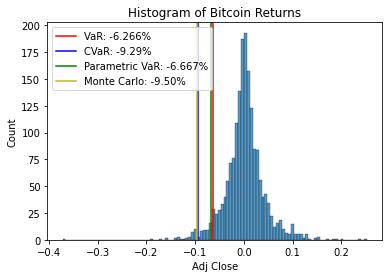

In [28]:
ax = sns.histplot(data=btc_returns)
ax.set_title('Histogram of Bitcoin Returns')
plt.axvline(x = -0.06266,color = 'r', label = 'VaR: -6.266%')
plt.axvline(x = -0.0929, color = 'b', label = 'CVaR: -9.29%')
plt.axvline(x = -0.06667, color = 'g', label = 'Parametric VaR: -6.667%')
plt.axvline(x = -0.0951, color = 'y', label = 'Monte Carlo: -9.50%')
plt.legend(loc = 'upper left')
plt.savefig("Bitcoin Returns Histogram.jpg")
plt.show()

#### Ethereum

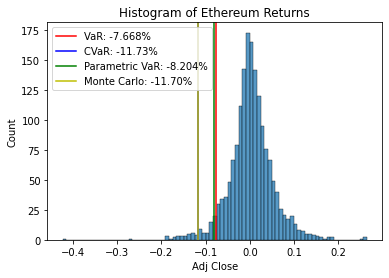

In [29]:
ax = sns.histplot(data=eth_returns)
ax.set_title('Histogram of Ethereum Returns')
plt.axvline(x = -0.07668,color = 'r', label = 'VaR: -7.668%')
plt.axvline(x = -0.1173, color = 'b', label = 'CVaR: -11.73%')
plt.axvline(x = -0.08204, color = 'g', label = 'Parametric VaR: -8.204%')
plt.axvline(x = -0.1170, color = 'y', label = 'Monte Carlo: -11.70%')
plt.legend(loc = 'upper left')
plt.savefig("Ethereum Returns Histogram.jpg")
plt.show()

#### USDT

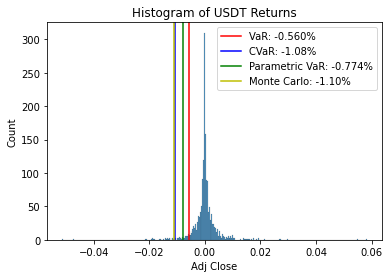

In [30]:
ax = sns.histplot(data=usdt_returns)
ax.set_title('Histogram of USDT Returns')
plt.axvline(x = -0.00560,color = 'r', label = 'VaR: -0.560%')
plt.axvline(x = -0.0108, color = 'b', label = 'CVaR: -1.08%')
plt.axvline(x = -0.00774, color = 'g', label = 'Parametric VaR: -0.774%')
plt.axvline(x = -0.011, color = 'y', label = 'Monte Carlo: -1.10%')
plt.legend(loc = 'upper right')
plt.savefig("USDT Returns Histogram.jpg")
plt.show()

## 1. Correlation between Time Series 

In [31]:
prices = pdr.get_data_yahoo(["BTC-USD","ETH-USD","USDT-USD","^GSPC","GC=F","DX-Y.NYB"], start, end)["Adj Close"]


[*********************100%***********************]  6 of 6 completed


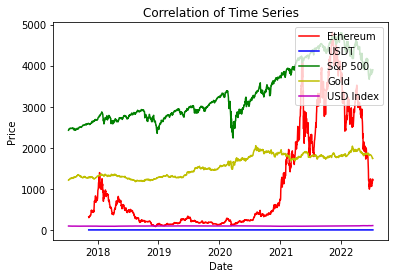

In [32]:
fig, ax = plt.subplots()
ax = sns.lineplot(data=prices, x='Date', y='ETH-USD', color = 'r', label = 'Ethereum')
ax = sns.lineplot(data=prices, x='Date', y='USDT-USD', color = 'b', label = 'USDT')
ax = sns.lineplot(data=prices, x='Date', y='^GSPC', color = 'g', label = 'S&P 500')
ax = sns.lineplot(data=prices, x='Date', y='GC=F', color = 'y', label = 'Gold')
ax = sns.lineplot(data=prices, x='Date', y='DX-Y.NYB', color = 'm', label = 'USD Index')
ax.set_ylabel('Price')
ax.legend(loc='upper right')
ax.set_title('Correlation of Time Series')
fig.savefig("Correlation of Time Series.jpg")
plt.show()

## 2. Pearson Correlation

,BTC-USD,DX-Y.NYB,ETH-USD,GC=F,USDT-USD,^GSPC
BTC-USD,1.000000,NaN,0.927235,NaN,-0.151211,NaN
DX-Y.NYB,NaN,1.000000,NaN,0.024041,NaN,-0.030203
ETH-USD,0.927235,NaN,1.000000,NaN,-0.148693,NaN
GC=F,NaN,0.024041,NaN,1.000000,NaN,0.806539
USDT-USD,-0.151211,NaN,-0.148693,NaN,1.000000,NaN
^GSPC,NaN,-0.030203,NaN,0.806539,NaN,1.000000


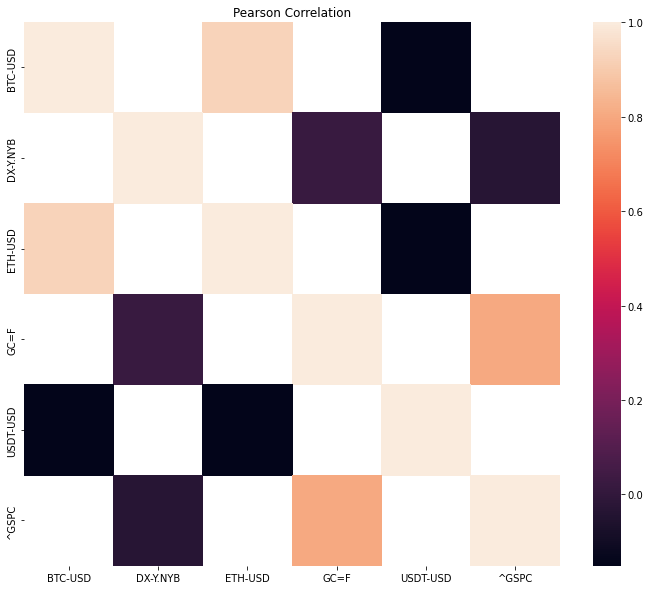

In [33]:
corr = prices.corr(method="pearson")
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr)
ax.set_title('Pearson Correlation')
fig.savefig("Pearson Correlation.jpg")
corr 

## 3. Spearman Correlation

,BTC-USD,DX-Y.NYB,ETH-USD,GC=F,USDT-USD,^GSPC
BTC-USD,1.000000,NaN,0.874387,NaN,-0.251261,NaN
DX-Y.NYB,NaN,1.000000,NaN,-0.058172,NaN,0.001515
ETH-USD,0.874387,NaN,1.000000,NaN,-0.332561,NaN
GC=F,NaN,-0.058172,NaN,1.000000,NaN,0.797189
USDT-USD,-0.251261,NaN,-0.332561,NaN,1.000000,NaN
^GSPC,NaN,0.001515,NaN,0.797189,NaN,1.000000


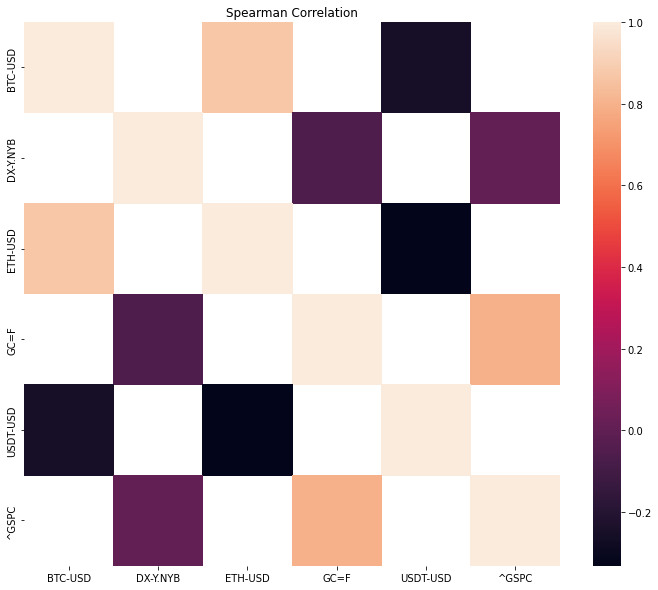

In [34]:
corr = prices.corr(method="spearman")
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr)
ax.set_title('Spearman Correlation')
fig.savefig("Spearman Correlation.jpg")
corr 

## 4. Kendall Correlation

,BTC-USD,DX-Y.NYB,ETH-USD,GC=F,USDT-USD,^GSPC
BTC-USD,1.000000,NaN,0.710509,NaN,-0.173910,NaN
DX-Y.NYB,NaN,1.000000,NaN,-0.031847,NaN,0.017591
ETH-USD,0.710509,NaN,1.000000,NaN,-0.223792,NaN
GC=F,NaN,-0.031847,NaN,1.000000,NaN,0.554341
USDT-USD,-0.173910,NaN,-0.223792,NaN,1.000000,NaN
^GSPC,NaN,0.017591,NaN,0.554341,NaN,1.000000


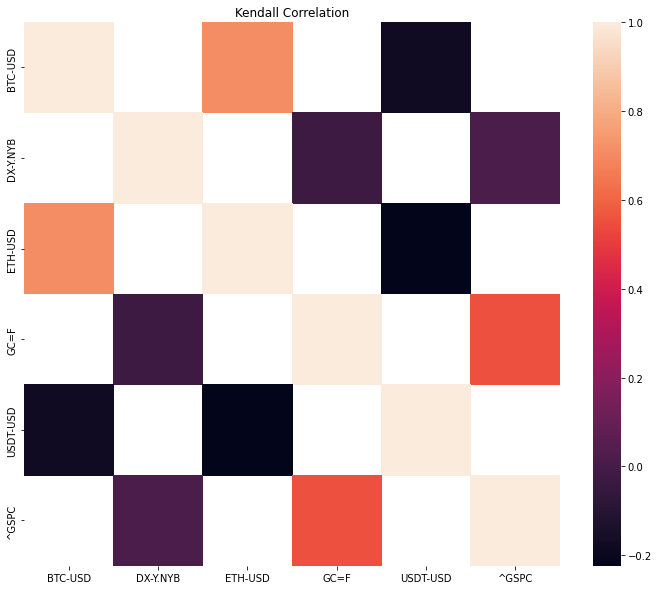

In [35]:
corr = prices.corr(method="kendall")
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr)
ax.set_title('Kendall Correlation')
fig.savefig("Kendall Correlation.jpg")
corr 